In [1]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from termcolor import colored
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Stations = pd.read_csv('stations.csv', low_memory=False)

In [3]:
OD_2016_123 = pd.read_csv('2016_123_trip.csv', low_memory=False)
OD_2016_04 = pd.read_csv('201604_trip.csv', low_memory=False)
OD_2016_05 = pd.read_csv('201605_trip.csv', low_memory=False)

In [5]:
# Importing the datasets
OD_2017 = pd.read_csv('201701.csv', low_memory=False)

OD_2016_06 = pd.read_csv('201606_trip.csv',usecols=['starttime','start station id','stoptime','end station id','tripduration'],low_memory=False)
OD_2016_06.rename(columns = {"tripduration": "duration_sec", "starttime": "start_date", "stoptime": "end_date","start station id":"start_station_code","end station id":"end_station_code"}, inplace=True)
OD_2016_07 = pd.read_csv('201607_trip.csv',usecols=['starttime','start station id','stoptime','end station id','tripduration'], low_memory=False)
OD_2016_07.rename(columns = {"tripduration": "duration_sec", "starttime": "start_date", "stoptime": "end_date","start station id":"start_station_code","end station id":"end_station_code"}, inplace=True)

OD_2016_08 = pd.read_csv('201608_trip.csv',usecols=['starttime','start station id','stoptime','end station id','tripduration'], low_memory=False)
OD_2016_08.rename(columns = {"tripduration": "duration_sec", "starttime": "start_date", "stoptime": "end_date","start station id":"start_station_code","end station id":"end_station_code"}, inplace=True)

OD_2016_09 = pd.read_csv('201609_trip.csv',usecols=['starttime','start station id','stoptime','end station id','tripduration'], low_memory=False)
OD_2016_09.rename(columns = {"tripduration": "duration_sec", "starttime": "start_date", "stoptime": "end_date","start station id":"start_station_code","end station id":"end_station_code"}, inplace=True)

#Stations_2015 = pd.read_csv('../input/Stations_2015.csv', low_memory=False)
#Stations_2016 = pd.read_csv('../input/Stations_2016.csv', low_memory=False)
#Stations_2017 = pd.read_csv('../input/Stations_2017.csv', sep = ';', low_memory=False)

In [6]:
OD_2016_10 = pd.read_csv('201610_trip.csv',usecols=['Start Time','Start Station ID','Stop Time','End Station ID','Trip Duration'], low_memory=False)
OD_2016_10.rename(columns = {"Trip Duration": "duration_sec", "Start Time": "start_date", "Stop Time": "end_date","Start Station ID":"start_station_code","End Station ID":"end_station_code"}, inplace=True)

In [7]:
OD_2016_11 = pd.read_csv('201611_trip.csv',usecols=['Start Time','Start Station ID','Stop Time','End Station ID','Trip Duration'], low_memory=False)
OD_2016_11.rename(columns = {"Trip Duration": "duration_sec", "Start Time": "start_date", "Stop Time": "end_date","Start Station ID":"start_station_code","End Station ID":"end_station_code"}, inplace=True)

In [8]:
OD_2016_12 = pd.read_csv('201612_trip.csv',usecols=['Start Time','Start Station ID','Stop Time','End Station ID','Trip Duration'], low_memory=False)
OD_2016_12.rename(columns = {"Trip Duration": "duration_sec", "Start Time": "start_date", "Stop Time": "end_date","Start Station ID":"start_station_code","End Station ID":"end_station_code"}, inplace=True)

In [9]:
SD_2016 = OD_2016_123.append(OD_2016_04, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_05, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_06, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_07, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_08, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_09, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_10, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_11, ignore_index=True)
SD_2016 = SD_2016.append(OD_2016_12, ignore_index=True)

In [10]:
SD_2016 = SD_2016.sort_values('start_date')
SD_2016.reset_index(drop=True, inplace=True)
SD_2016.head()

,duration_sec,end_date,end_station_code,start_date,start_station_code
0,923,1/1/16 0:16,3002,1/1/16 0:00,268
1,379,1/1/16 0:07,498,1/1/16 0:00,476
2,589,1/1/16 0:10,284,1/1/16 0:00,489
3,889,1/1/16 0:15,3002,1/1/16 0:01,268
4,1480,1/1/16 0:25,2006,1/1/16 0:01,2006


In [11]:
SD_2016.tail()

,duration_sec,end_date,end_station_code,start_date,start_station_code
13681945,885,9/10/2016 00:14:41,317,9/9/2016 23:59:56,383
13681946,579,9/10/2016 00:09:36,334,9/9/2016 23:59:57,382
13681947,274,9/10/2016 00:04:32,317,9/9/2016 23:59:58,3265
13681948,1847,9/10/2016 00:30:46,3151,9/9/2016 23:59:58,247
13681949,2083,9/10/2016 00:34:42,167,9/9/2016 23:59:59,326


In [12]:
Stations.head()

,code,name,latitude,longitude
0,3002,South End Ave & Liberty St,40.711512,-74.015756
1,498,Broadway & W 32 St,40.748549,-73.988084
2,284,Greenwich Ave & 8 Ave,40.739017,-74.002638
3,2006,Central Park S & 6 Ave,40.765909,-73.976342
4,389,Broadway & Berry St,40.710446,-73.965251


### 2.1.1. Let's sort it by the total useage duration

In [13]:
SD_2016.end_station_code = SD_2016.end_station_code.astype(int)
StartUsedSorted = pd.DataFrame(SD_2016.groupby(by=['start_station_code'])['duration_sec'].sum())
StartUsedSorted.columns = ['Total duration seconds']
StartUsedSorted = StartUsedSorted.sort_values(by = 'Total duration seconds', ascending=False)
StartUsedSorted.head()

,Total duration seconds
start_station_code,
2006,137310059
426,126883248
519,123941640
514,104251293
387,98885436


### 2.1.2. Let's sort it by the total used times

In [14]:
StartSorted = SD_2016.groupby(by=['start_station_code'])['start_date'].agg({'Count': np.size})
StartSorted['Count'] = StartSorted.Count.astype(int)
StartSorted = StartSorted.sort_values(by = 'Count', ascending=False)
StartSorted.head()

,Count
start_station_code,
519,149382
435,99544
497,98328
426,96530
402,96326


### 2.1.3. Let's plot useage duration distribution and Toal useage times

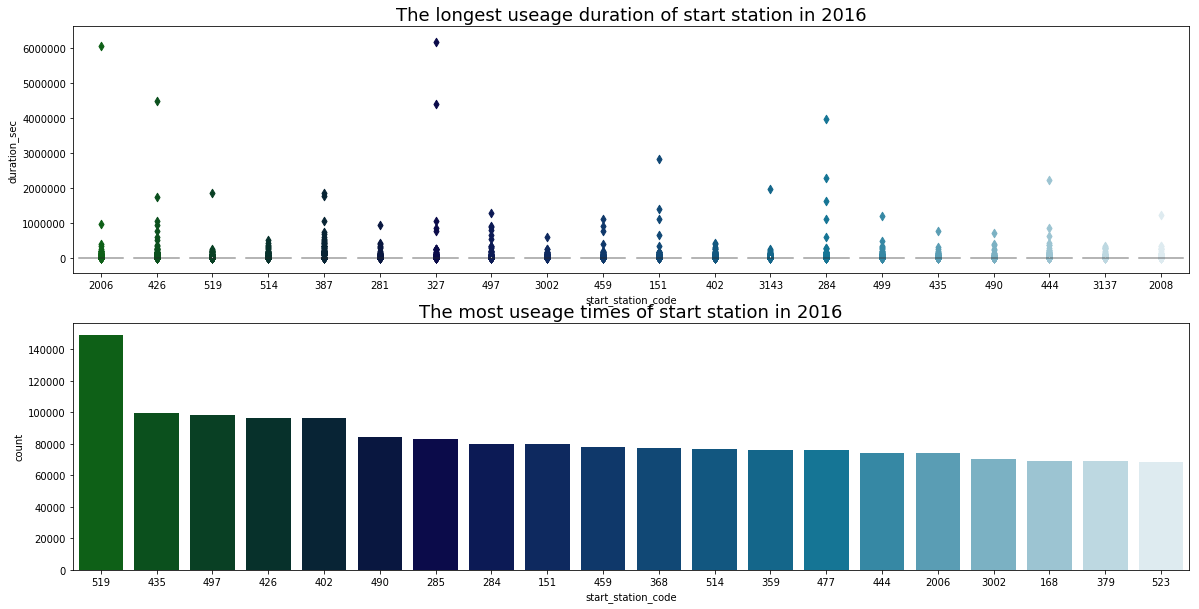

In [15]:
f, axes = plt.subplots(2, 1, figsize=(20,10))
plt.sca(axes[0])
TopStartUsedStation = np.array(StartUsedSorted.head(20).index)
TopStartUsedStationData = SD_2016[SD_2016['start_station_code'].isin(TopStartUsedStation)]
sns.lvplot(data=TopStartUsedStationData,x='start_station_code', y='duration_sec',order=TopStartUsedStation,palette="ocean")
plt.title('The longest useage duration of start station in 2016', fontsize = 18)

plt.sca(axes[1])
TopStartUsed = np.array(StartSorted.head(20).index)
TopStartUsedData = SD_2016[SD_2016['start_station_code'].isin(TopStartUsed)]
sns.countplot(data= TopStartUsedData, x ='start_station_code',order=TopStartUsed,palette="ocean")
plt.title('The most useage times of start station in 2016', fontsize = 18)
plt.show()

### 2.1.4. Let's see what is the most useless station based on total used duration

In [16]:
StartUsedSorted_r = StartUsedSorted.sort_values(by = 'Total duration seconds', ascending=True)
StartUsedSorted_r.head()

,Total duration seconds
start_station_code,
3385,679
294,978
3036,1713
3240,2240
3239,6472


### 2.1.5. Let's see what is the most useless station based on total used times

In [17]:
StartSorted_r = StartSorted.sort_values(by = 'Count', ascending=True)
StartSorted_r.head()

,Count
start_station_code,
3385,1
294,2
3240,3
3266,7
3014,9


### 2.1.6. Let's plot the imformation of most useless station

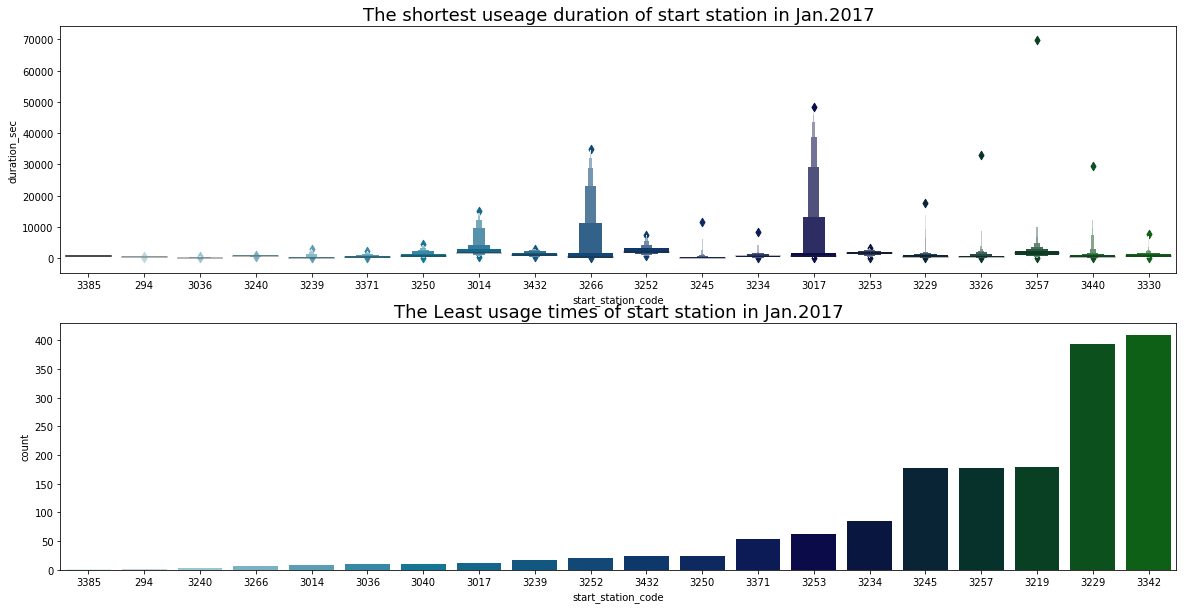

In [18]:
#sns.set(style="whitegrid")
f, axes = plt.subplots(2, 1, figsize=(20,10))
plt.sca(axes[0])
LowStartUsedStation = np.array(StartUsedSorted_r.head(20).index)
LowStartUsedStationData = SD_2016[SD_2016['start_station_code'].isin(LowStartUsedStation)]
vis2 = sns.lvplot(data=LowStartUsedStationData,x='start_station_code', y='duration_sec', order=LowStartUsedStation, palette="ocean_r")
plt.title('The shortest useage duration of start station in Jan.2017', fontsize = 18)

plt.sca(axes[1])
LowStartUsed = np.array(StartSorted_r.head(20).index)
LowStartUsedData = SD_2016[SD_2016['start_station_code'].isin(LowStartUsed)]
sns.countplot(data= LowStartUsedData, x ='start_station_code',order=LowStartUsed,palette="ocean_r")
plt.title('The Least usage times of start station in Jan.2017', fontsize = 18)
plt.show()

### 2.2. Analysing Based on End Station

### 2.2.1. Let's sort it by the total useage duration

In [19]:
EndUsedSorted = pd.DataFrame(SD_2016.groupby(by=['end_station_code'])['duration_sec'].sum())
EndUsedSorted.columns = ['Total duration seconds']
EndUsedSorted = EndUsedSorted.sort_values(by = 'Total duration seconds', ascending=False)
EndUsedSorted.head()

,Total duration seconds
end_station_code,
3250,168761294
426,121677779
2006,116893227
519,116286227
514,102009651


### 2.2.2. Let's sort it by the total used times

In [20]:
EndSorted = SD_2016.groupby(by=['end_station_code'])['start_date'].agg({'Count': np.size})
EndSorted['Count'] = EndSorted.Count.astype(int)
EndSorted = EndSorted.sort_values(by = 'Count', ascending=False)
EndSorted.head()

,Count
end_station_code,
519,145953
402,103889
426,101318
497,101195
435,100578


### 2.2.3. Let's plot useage duration distribution and Toal useage times

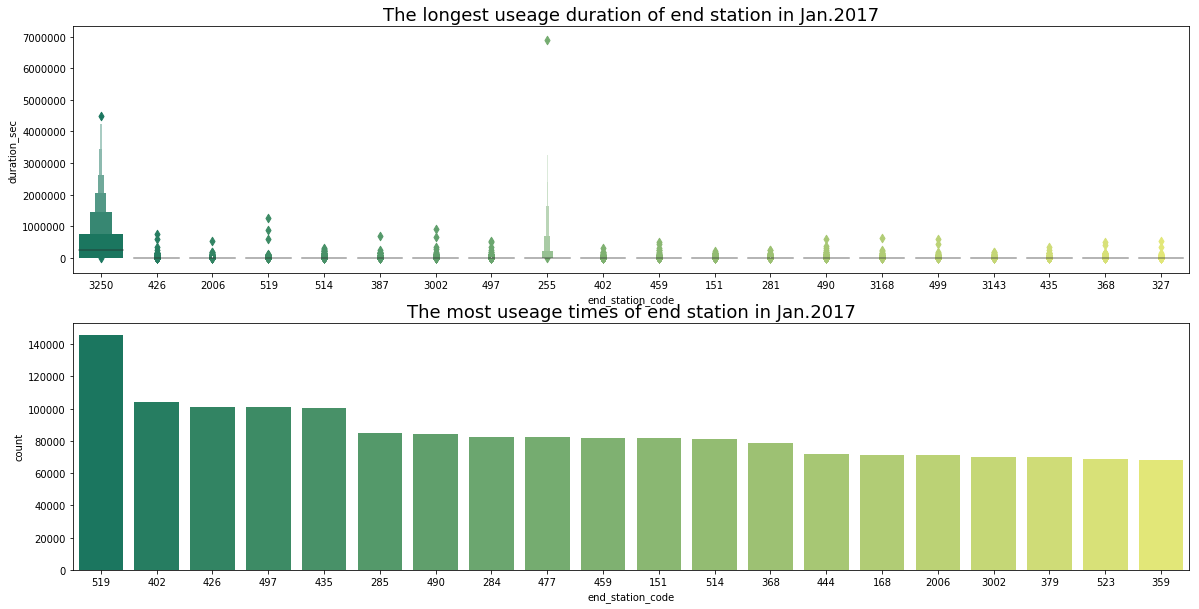

In [21]:
f, axes = plt.subplots(2, 1, figsize=(20,10))
plt.sca(axes[0])
TopEndUsedStation = np.array(EndUsedSorted.head(20).index)
TopEndUsedStationData = SD_2016[SD_2016['end_station_code'].isin(TopEndUsedStation)]
sns.lvplot(data=TopEndUsedStationData,x='end_station_code', y='duration_sec',order=TopEndUsedStation, palette="summer")
plt.title('The longest useage duration of end station in Jan.2017', fontsize = 18)

plt.sca(axes[1])
TopEndUsed = np.array(EndSorted.head(20).index)
TopEndUsedData = SD_2016[SD_2016['end_station_code'].isin(TopEndUsed)]
sns.countplot(data= TopEndUsedData, x ='end_station_code',order=TopEndUsed, palette="summer")
plt.title('The most useage times of end station in Jan.2017', fontsize = 18)
plt.show()

### 2.2.4. Let's see what is the most useless station based on total used duration

In [22]:
EndUsedSorted_r = EndUsedSorted.sort_values(by = 'Total duration seconds', ascending=True)
EndUsedSorted_r.head()

,Total duration seconds
end_station_code,
3439,121
294,787
3385,1322
3211,1388
3014,1412


### 2.2.5. Let's see what is the most useless station based on total used times

In [23]:
EndSorted_r = EndSorted.sort_values(by = 'Count', ascending=True)
EndSorted_r.head()

,Count
end_station_code,
3220,1
3211,1
3197,1
3206,1
3439,1


### 2.2.6. Let's Plot the Imformation of Most Useless Station

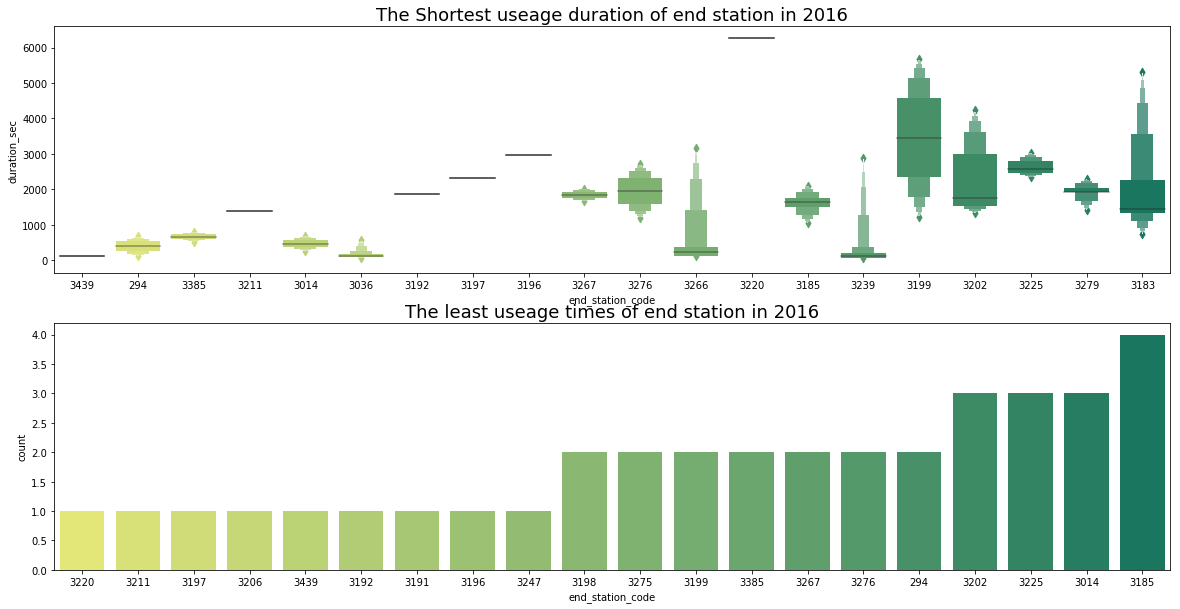

In [26]:
f, axes = plt.subplots(2, 1, figsize=(20,10))
plt.sca(axes[0])
LowEndUsedStation = np.array(EndUsedSorted_r.head(20).index)
LowEndUsedStationData = SD_2016[SD_2016['end_station_code'].isin(LowEndUsedStation)]
sns.lvplot(data=LowEndUsedStationData,x='end_station_code', y='duration_sec',order=LowEndUsedStation, palette="summer_r")
plt.title('The Shortest useage duration of end station in 2016', fontsize = 18)

plt.sca(axes[1])
LowEndUsed = np.array(EndSorted_r.head(20).index)
LowEndUsedData = SD_2016[SD_2016['end_station_code'].isin(LowEndUsed)]
sns.countplot(data= LowEndUsedData, x ='end_station_code',order=LowEndUsed, palette="summer_r")
plt.title('The least useage times of end station in 2016', fontsize = 18)
plt.show()

In [55]:
SD_2016_05 = OD_2016_05
SD_2016_05.start_station_code = SD_2016_05.start_station_code.astype(int)
StartUsedSorted_05 = pd.DataFrame(SD_2016_05.groupby(by=['start_station_code'])['duration_sec'].sum())
StartUsedSorted_05.columns = ['Total duration seconds']
StartUsedSorted_05 = StartUsedSorted_05.sort_values(by = 'Total duration seconds', ascending=False)
StartUsedSorted_05.head()

,Total duration seconds
start_station_code,
426,13157961
2006,11251499
519,10108813
327,9153310
514,8788228


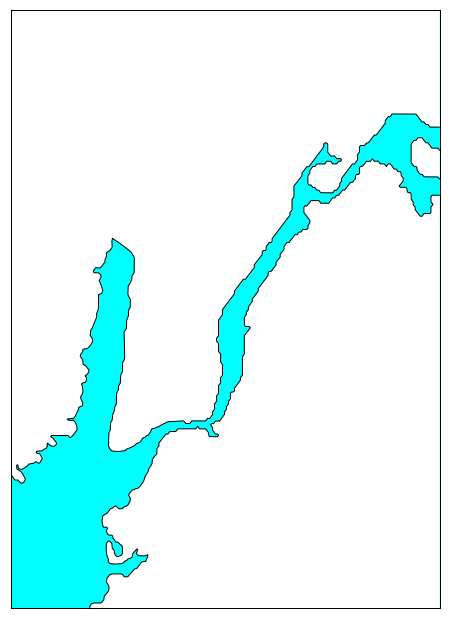

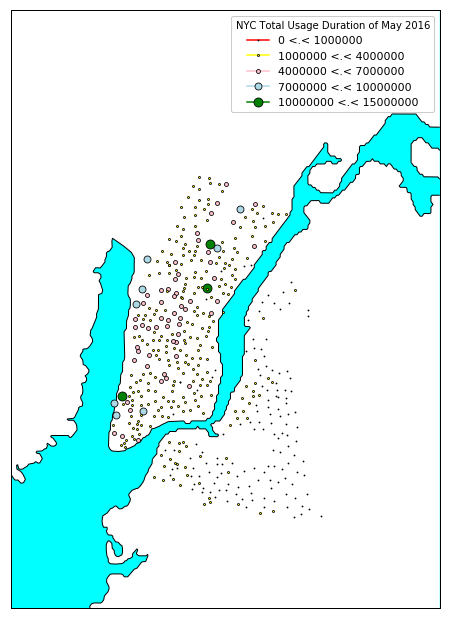

In [58]:
StartUsedSorted_05['start_station_code'] = StartUsedSorted_05.index
Full2017 = StartUsedSorted_05.merge(Stations, left_on = 'start_station_code', right_on='code' )
station_useage = Full2017['Total duration seconds'].values

plt.figure(figsize=(11,11))

colors_choice = ['red', 'yellow', 'pink','lightblue', 'green']
size_limits = [0, 1000000, 4000000, 7000000, 10000000,15000000]
labels = []
size_choice = [1, 2, 4,7,9]
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
map = Basemap(projection='lcc', 
            lat_0=40.76,
            lon_0=-73.98,
            resolution='f',
            llcrnrlon=-74.06, llcrnrlat=40.65,
            urcrnrlon=-73.88, urcrnrlat=40.84)
map.drawcoastlines()
map.drawcountries()
map.drawrivers(color='#0099ff')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='w', lake_color='#0099ff')
#map.fillcontinents(rivers_color='aqua')
for index, (code, y,x) in Full2017[['start_station_code', 'latitude', 'longitude']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < station_useage[index]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = size_choice[ind], alpha=1, markeredgewidth = 0.8, color = colors_choice[ind], markeredgecolor='k', label = labels[ind])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('0 <.< 1000000', '1000000 <.< 4000000', '4000000 <.< 7000000',
             '7000000 <.< 10000000','10000000 <.< 15000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 0, prop= {'size':11},
           title='NYC Total Usage Duration of May 2016', frameon = True, framealpha = 1)
plt.show()

## Predict Model

In [10]:
#Convert to datetime so that it can be manipulated more easily
OD_2016_123.start_date = pd.to_datetime(OD_2016_123.start_date, format='%m/%d/%y %H:%M')

In [11]:
OD_2016_04.start_date = pd.to_datetime(OD_2016_04.start_date, format='%m/%d/%Y %H:%M:%S')

In [12]:
OD_2016_05.start_date = pd.to_datetime(OD_2016_05.start_date, format='%m/%d/%y %H:%M')

In [13]:
for i in range(4):
    j = i+6
    j = '0{}'.format(j)
    s = str(j)
    k = 'OD_2016_'+ s
    print (k)
    k = eval(k)
    k.start_date = pd.to_datetime(k.start_date, format='%m/%d/%Y %H:%M:%S')

OD_2016_06
OD_2016_07
OD_2016_08
OD_2016_09


In [14]:
OD_2016_10.start_date = pd.to_datetime(OD_2016_10.start_date, format='%Y-%m-%d %H:%M:%S')
OD_2016_11.start_date = pd.to_datetime(OD_2016_11.start_date, format='%Y-%m-%d %H:%M:%S')
OD_2016_12.start_date = pd.to_datetime(OD_2016_12.start_date, format='%Y-%m-%d %H:%M:%S')

In [15]:
OD_2016 = OD_2016_123.append(OD_2016_04, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_05, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_06, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_07, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_08, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_09, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_10, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_11, ignore_index=True)
OD_2016 = OD_2016.append(OD_2016_12, ignore_index=True)

In [16]:
OD_2016

,duration_sec,end_date,end_station_code,start_date,start_station_code
0,923,1/1/16 0:16,3002,2016-01-01 00:00:00,268
1,379,1/1/16 0:07,498,2016-01-01 00:00:00,476
2,589,1/1/16 0:10,284,2016-01-01 00:00:00,489
3,889,1/1/16 0:15,3002,2016-01-01 00:01:00,268
4,1480,1/1/16 0:25,2006,2016-01-01 00:01:00,2006
5,332,1/1/16 0:06,389,2016-01-01 00:01:00,3104
6,2321,1/1/16 0:40,3164,2016-01-01 00:01:00,3167
7,694,1/1/16 0:13,497,2016-01-01 00:02:00,268
8,1376,1/1/16 0:26,259,2016-01-01 00:03:00,527
9,615,1/1/16 0:13,311,2016-01-01 00:03:00,432


In [17]:
#Extract the year, month, and day from start_date
OD_2016['date'] = OD_2016.start_date.dt.date

In [18]:
#Each entry in the date feature is a trip. 
#By finding the total number of times a date is listed, we know how many trips were taken on that date.
dates = {}
for d in OD_2016.date:
    if d not in dates:
        dates[d] = 1
    else:
        dates[d] += 1

In [19]:
#Create the data frame that will be used for training, with the dictionary we just created.
df2 = pd.DataFrame.from_dict(dates, orient = "index")
df2['date'] = df2.index
df2['trips'] = df2.ix[:,0]
train = df2.ix[:,1:3]
train.reset_index(drop = True, inplace = True)

train

,date,trips
0,2016-02-08,19026
1,2016-08-04,56604
2,2016-07-14,50350
3,2016-01-16,19178
4,2016-10-10,52255
5,2016-11-07,49890
6,2016-07-30,27780
7,2016-03-21,26414
8,2016-09-08,61596
9,2016-02-23,16133


In [20]:
#All sorted now!
train = train.sort_values('date')
train.reset_index(drop=True, inplace=True)

train

,date,trips
0,2016-01-01,11009
1,2016-01-02,14587
2,2016-01-03,15499
3,2016-01-04,19593
4,2016-01-05,18053
5,2016-01-06,24569
6,2016-01-07,27773
7,2016-01-08,28709
8,2016-01-09,20846
9,2016-01-10,14275


In [21]:
#Find all of the holidays during our time span
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=train.date.min(), end=train.date.max())

In [22]:
#Find all of the business days in our time span
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
business_days = pd.DatetimeIndex(start=train.date.min(), end=train.date.max(), freq=us_bd)

In [23]:
business_days = pd.to_datetime(business_days, format='%Y/%m/%d').date
holidays = pd.to_datetime(holidays, format='%Y/%m/%d').date

In [24]:
#A 'business_day' or 'holiday' is a date within either of the respected lists.
train['business_day'] = train.date.isin(business_days)
train['holiday'] = train.date.isin(holidays)

In [25]:
train

,date,trips,business_day,holiday
0,2016-01-01,11009,False,True
1,2016-01-02,14587,False,False
2,2016-01-03,15499,False,False
3,2016-01-04,19593,True,False
4,2016-01-05,18053,True,False
5,2016-01-06,24569,True,False
6,2016-01-07,27773,True,False
7,2016-01-08,28709,True,False
8,2016-01-09,20846,False,False
9,2016-01-10,14275,False,False


In [26]:
#Convert True to 1 and False to 0
train.business_day = train.business_day.map(lambda x: 1 if x == True else 0)
train.holiday = train.holiday.map(lambda x: 1 if x == True else 0)

In [27]:
#Convert date to the important features, year, month, weekday (0 = Monday, 1 = Tuesday...)
#We don't need day because what it represents changes every year.
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['weekday'] = pd.to_datetime(train['date']).dt.weekday

In [28]:
labels = train.trips
train = train.drop(['trips', 'date'], 1)

In [29]:
train

,business_day,holiday,year,month,weekday
0,0,1,2016,1,4
1,0,0,2016,1,5
2,0,0,2016,1,6
3,1,0,2016,1,0
4,1,0,2016,1,1
5,1,0,2016,1,2
6,1,0,2016,1,3
7,1,0,2016,1,4
8,0,0,2016,1,5
9,0,0,2016,1,6


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error, median_absolute_error

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state = 2)


In [32]:
def scoring(clf):
    scores = cross_val_score(clf, X_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores) * -1)

In [33]:
rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 2)
scoring(rfr)

5885.18180375


In [34]:
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
scoring(gbr)

6377.98883339


In [35]:
dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)
scoring(dtr)

5928.6


In [36]:
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 2)
scoring(abr)

5642.75


In [37]:
import warnings
warnings.filterwarnings("ignore")

random_state = 2
params = {
        'eta': 0.15,
        'max_depth': 6,
        'min_child_weight': 2,
        'subsample': 1,
        'colsample_bytree': 1,
        'verbose_eval': True,
        'seed': random_state,
    }

n_folds = 15 #number of Kfolds
cv_scores = [] #The sum of the mean_absolute_error for each fold.
early_stopping_rounds = 100
iterations = 10000
printN = 50
fpred = [] #stores the sums of predicted values for each fold.

testFinal = xgb.DMatrix(X_test)

kf = KFold(len(X_train), n_folds=n_folds)

for i, (train_index, test_index) in enumerate(kf):
    print('\n Fold %d' % (i+1))
    Xtrain, Xval = X_train.iloc[train_index], X_train.iloc[test_index]
    Ytrain, Yval = y_train.iloc[train_index], y_train.iloc[test_index]
    
    xgtrain = xgb.DMatrix(Xtrain, label = Ytrain)
    xgtest = xgb.DMatrix(Xval, label = Yval)
    watchlist = [(xgtrain, 'train'), (xgtest, 'eval')] 
    
    xgbModel = xgb.train(params, 
                         xgtrain, 
                         iterations, 
                         watchlist,
                         verbose_eval = printN,
                         early_stopping_rounds=early_stopping_rounds
                        )
    
    scores_val = xgbModel.predict(xgtest, ntree_limit=xgbModel.best_ntree_limit)
    cv_score = median_absolute_error(Yval, scores_val)
    print('eval-MSE: %.6f' % cv_score)
    y_pred = xgbModel.predict(testFinal, ntree_limit=xgbModel.best_ntree_limit)
    print(xgbModel.best_ntree_limit)

    if i > 0:
        fpred = pred + y_pred #sum predictions
    else:
        fpred = y_pred
    pred = fpred
    cv_scores.append(cv_score)

xgb_preds = pred / n_folds #find the average values for the predictions
score = np.median(cv_scores)
print('Median error: %.6f' % score)


 Fold 1
[0]	train-rmse:34943.6	eval-rmse:34213.1
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[50]	train-rmse:7284.82	eval-rmse:12688.3
[100]	train-rmse:7235.42	eval-rmse:12845.1
Stopping. Best iteration:
[15]	train-rmse:8415.66	eval-rmse:11345.5

eval-MSE: 6044.490234
16

 Fold 2
[0]	train-rmse:34711.6	eval-rmse:37902.2
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[50]	train-rmse:7622.09	eval-rmse:8512.42
[100]	train-rmse:7574.95	eval-rmse:8876.91
Stopping. Best iteration:
[30]	train-rmse:7701.42	eval-rmse:8329.25

eval-MSE: 5008.242188
31

 Fold 3
[0]	train-rmse:34613.7	eval-rmse:38972.3
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[50]	train-rmse:7428.07	eval-rmse:10586
[100]	train-rmse:739

In [97]:
#Train and make predictions with the best models.
gbr = gbr.fit(X_train, y_train)
dtr = dtr.fit(X_train, y_train)

gbr_preds = gbr.predict(X_test)
dtr_preds = dtr.predict(X_test)

#Weight the top models to find the best prediction
final_preds = dtr_preds*0.4 + gbr_preds*0.6
print ("Daily error of trip count:", median_absolute_error(y_test, final_preds))

Daily error of trip count: 4951.89859758


In [98]:
#A reminder of the range of values in number of daily trips.
labels.describe()

count      358.000000
mean     38217.737430
std      15264.327537
min       4653.000000
25%      25129.250000
50%      38521.000000
75%      52025.750000
max      69772.000000
Name: trips, dtype: float64

In [99]:
y_test.reset_index(drop = True, inplace = True)

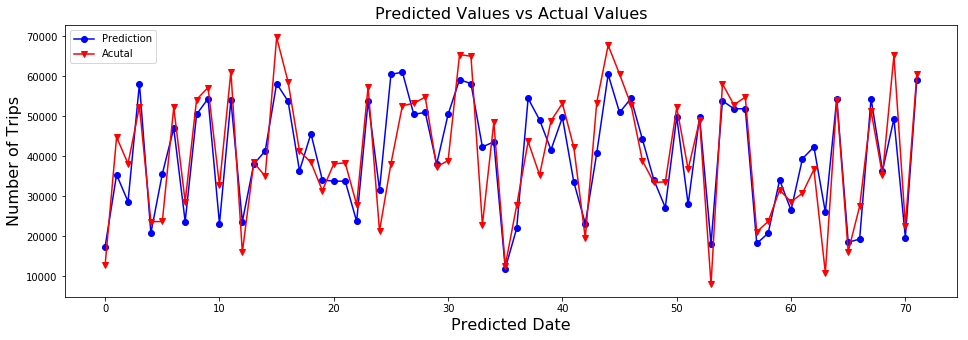

In [100]:
fs = 16
plt.figure(figsize=(16,5))
plt.plot(final_preds,'bo-')
plt.plot(y_test,'rv-')
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = fs)
plt.xlabel("Predicted Date", fontsize = fs)
plt.title("Predicted Values vs Actual Values", fontsize = fs)
plt.show()

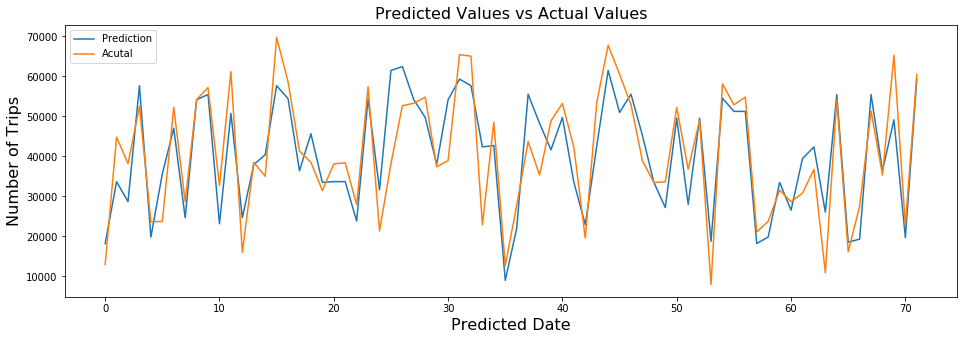

In [71]:
fs = 16
plt.figure(figsize=(16,5))
plt.plot(abr_preds)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = fs)
plt.xlabel("Predicted Date", fontsize = fs)
plt.title("Predicted Values vs Actual Values", fontsize = fs)
plt.show()

In [164]:
#Create a plot that ranks the features by importance.
def plot_importances(model, model_name):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for feature in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]    

    # Plot the feature importances of the forest
    plt.figure(figsize = (8,5))
    plt.title("Feature importances of " + model_name)
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

Feature ranking:
0 business_day
1 holiday
2 year
3 month
4 weekday


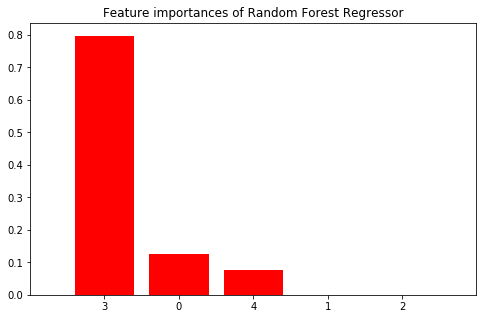

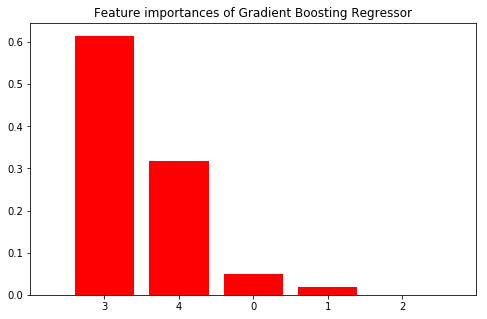

In [165]:
# Print the feature ranking
print("Feature ranking:")

i = 0
for feature in X_train:
    print (i, feature)
    i += 1
    
plot_importances(rfr, "Random Forest Regressor")
plot_importances(gbr, "Gradient Boosting Regressor")